In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [5]:
image_url = 'https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg'
image_path='dog.jpg'
gcv.utils.download(url=image_url,path=image_path)

'dog.jpg'

In [21]:
image = mx.image.imread('dog.jpg')
# Visualize image
# plt.imshow(image.asnumpy())


In [22]:
print('shape: ',image.shape)
print('data type: ',image.dtype)
print('min value: ',image.min().asscalar())
print('max value: ',image.max().asscalar())

shape:  (576, 768, 3)
data type:  <class 'numpy.uint8'>
min value:  0
max value:  255


In [23]:
# Transform for yolo net, provide short length, will resize height to 512px
# but still maintain aspect ratio

# Diff with classification:
# Resized not cropped
# batch of 1 image,  its now in NCHW format
# array of 32 bit float
# normalized using imagenet 1k statistics

image,chw_image = gcv.data.transforms.presets.yolo.transform_test(image,short=512)

In [24]:
print('shape: ',image.shape)
print('data type: ',image.dtype)
print('min value: ',image.min().asscalar())
print('max value: ',image.max().asscalar())

shape:  (1, 3, 512, 683)
data type:  <class 'numpy.float32'>
min value:  -2.117904
max value:  2.64


In [26]:
# Visualize image
# plt.imshow(chw_image)

In [27]:
network = gcv.model_zoo.get_model('yolo3_darknet53_coco', pretrained=True)

100%|██████████| 224190/224190 [00:06<00:00, 32800.67KB/s]


In [47]:
prediction = network(image)
# returns a tuple instead of an array 
type(prediction)

tuple

In [48]:
for index, array in enumerate(prediction):
    print('#{} shape: {}'.format(index + 1, array.shape))

#1 shape: (1, 100, 1)
#2 shape: (1, 100, 1)
#3 shape: (1, 100, 4)


In [49]:
# remove additional batch dimensions since it's only one imate
prediction = [array[0] for array in prediction]

In [50]:
# unpack tuple
class_indicies, probabilities, bounding_boxes = prediction

In [51]:
k = 10
print(class_indicies[:k])


[[16.]
 [ 1.]
 [ 7.]
 [ 2.]
 [13.]
 [58.]
 [ 0.]
 [-1.]
 [-1.]
 [-1.]]
<NDArray 10x1 @cpu(0)>


In [55]:
# show labels
#network.classes

In [56]:
print(probabilities[:k])


[[ 0.9922879 ]
 [ 0.9647315 ]
 [ 0.6834506 ]
 [ 0.24016152]
 [ 0.01802442]
 [ 0.01052033]
 [ 0.01037379]
 [-1.        ]
 [-1.        ]
 [-1.        ]]
<NDArray 10x1 @cpu(0)>


In [57]:
print(bounding_boxes[:k])


[[116.36319  201.53311  281.8408   482.3635  ]
 [ 94.05403  107.34943  505.0067   376.35275 ]
 [417.22052   69.66973  614.5993   149.04562 ]
 [417.22052   69.66973  614.5993   149.04562 ]
 [ 91.12276  124.96997  504.39172  403.38977 ]
 [ 51.112984  68.58975   95.06614  111.59631 ]
 [532.7634    92.19096  547.291    104.79472 ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]]
<NDArray 10x4 @cpu(0)>


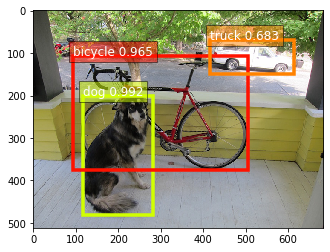

In [58]:
# Visualize with gluoncv
gcv.utils.viz.plot_bbox(chw_image,bounding_boxes,probabilities,class_indicies,class_names=network.classes)